In [312]:
import sys
sys.path.append('/Users/amanpreetsingh/My Computer/VSCode/Market')

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [313]:
df = pd.read_csv('/Users/amanpreetsingh/My Computer/VSCode/Market/house_price_data/train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [314]:
# Define the top 15 important features
top_features = ['OverallQual', 'YearBuilt', 'YearRemodAdd',
                   '1stFlrSF', 'GrLivArea', 'FullBath', 'Fireplaces', 
                   'GarageArea','ExterQual', 'Foundation', 'HeatingQC', 'Neighborhood', 'CentralAir',
                    'SaleCondition', 'PavedDrive', 'LotShape', 'SaleType', 'HouseStyle']


# Add target variable
target = 'SalePrice'

# Filter the DataFrame
df = df[top_features + [target]]

# Display the filtered DataFrame
df.head()


,OverallQual,YearBuilt,YearRemodAdd,1stFlrSF,GrLivArea,FullBath,Fireplaces,GarageArea,ExterQual,Foundation,HeatingQC,Neighborhood,CentralAir,SaleCondition,PavedDrive,LotShape,SaleType,HouseStyle,SalePrice
0,7,2003,2003,856,1710,2,0,548,Gd,PConc,Ex,CollgCr,Y,Normal,Y,Reg,WD,2Story,208500
1,6,1976,1976,1262,1262,2,1,460,TA,CBlock,Ex,Veenker,Y,Normal,Y,Reg,WD,1Story,181500
2,7,2001,2002,920,1786,2,1,608,Gd,PConc,Ex,CollgCr,Y,Normal,Y,IR1,WD,2Story,223500
3,7,1915,1970,961,1717,1,1,642,TA,BrkTil,Gd,Crawfor,Y,Abnorml,Y,IR1,WD,2Story,140000
4,8,2000,2000,1145,2198,2,1,836,Gd,PConc,Ex,NoRidge,Y,Normal,Y,IR1,WD,2Story,250000


In [315]:
df.isna().sum()

OverallQual      0
YearBuilt        0
YearRemodAdd     0
1stFlrSF         0
GrLivArea        0
FullBath         0
Fireplaces       0
GarageArea       0
ExterQual        0
Foundation       0
HeatingQC        0
Neighborhood     0
CentralAir       0
SaleCondition    0
PavedDrive       0
LotShape         0
SaleType         0
HouseStyle       0
SalePrice        0
dtype: int64

In [316]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   OverallQual    1460 non-null   int64 
 1   YearBuilt      1460 non-null   int64 
 2   YearRemodAdd   1460 non-null   int64 
 3   1stFlrSF       1460 non-null   int64 
 4   GrLivArea      1460 non-null   int64 
 5   FullBath       1460 non-null   int64 
 6   Fireplaces     1460 non-null   int64 
 7   GarageArea     1460 non-null   int64 
 8   ExterQual      1460 non-null   object
 9   Foundation     1460 non-null   object
 10  HeatingQC      1460 non-null   object
 11  Neighborhood   1460 non-null   object
 12  CentralAir     1460 non-null   object
 13  SaleCondition  1460 non-null   object
 14  PavedDrive     1460 non-null   object
 15  LotShape       1460 non-null   object
 16  SaleType       1460 non-null   object
 17  HouseStyle     1460 non-null   object
 18  SalePrice      1460 non-null

In [317]:
df.describe()

,OverallQual,YearBuilt,YearRemodAdd,1stFlrSF,GrLivArea,FullBath,Fireplaces,GarageArea,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,6.099315,1971.267808,1984.865753,1162.626712,1515.463699,1.565068,0.613014,472.980137,180921.195890
std,1.382997,30.202904,20.645407,386.587738,525.480383,0.550916,0.644666,213.804841,79442.502883
min,1.000000,1872.000000,1950.000000,334.000000,334.000000,0.000000,0.000000,0.000000,34900.000000
25%,5.000000,1954.000000,1967.000000,882.000000,1129.500000,1.000000,0.000000,334.500000,129975.000000
50%,6.000000,1973.000000,1994.000000,1087.000000,1464.000000,2.000000,1.000000,480.000000,163000.000000
75%,7.000000,2000.000000,2004.000000,1391.250000,1776.750000,2.000000,1.000000,576.000000,214000.000000
max,10.000000,2010.000000,2010.000000,4692.000000,5642.000000,3.000000,3.000000,1418.000000,755000.000000


In [318]:
numeric_features = df.select_dtypes(include=['int64','float64']).columns.tolist()
print(numeric_features)
categorical_features = df.select_dtypes(include=['object']).columns.tolist()
print(categorical_features)

['OverallQual', 'YearBuilt', 'YearRemodAdd', '1stFlrSF', 'GrLivArea', 'FullBath', 'Fireplaces', 'GarageArea', 'SalePrice']
['ExterQual', 'Foundation', 'HeatingQC', 'Neighborhood', 'CentralAir', 'SaleCondition', 'PavedDrive', 'LotShape', 'SaleType', 'HouseStyle']


/Users/amanpreetsingh/My Computer/VSCode/Market/analysis/analysis_src/univariate_analysis.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=df, palette="muted")


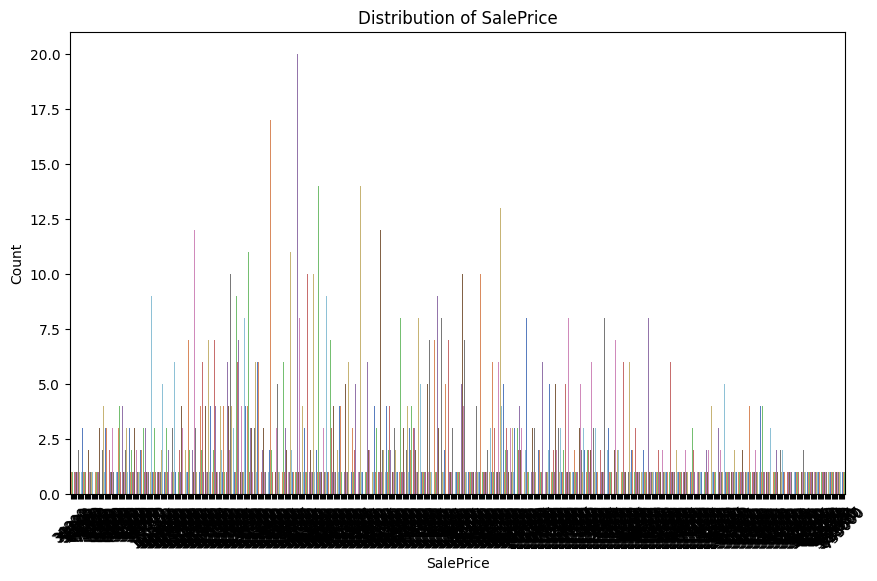

In [319]:
from analysis.analysis_src.univariate_analysis import hist_plot,count_plot
count_plot().my_plot(df,'SalePrice')

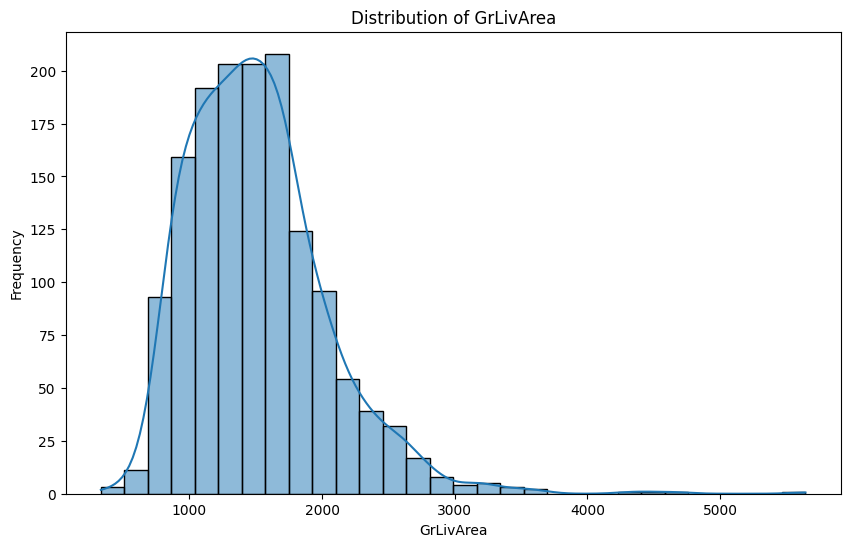

In [320]:
hist_plot().my_plot(df,'GrLivArea')

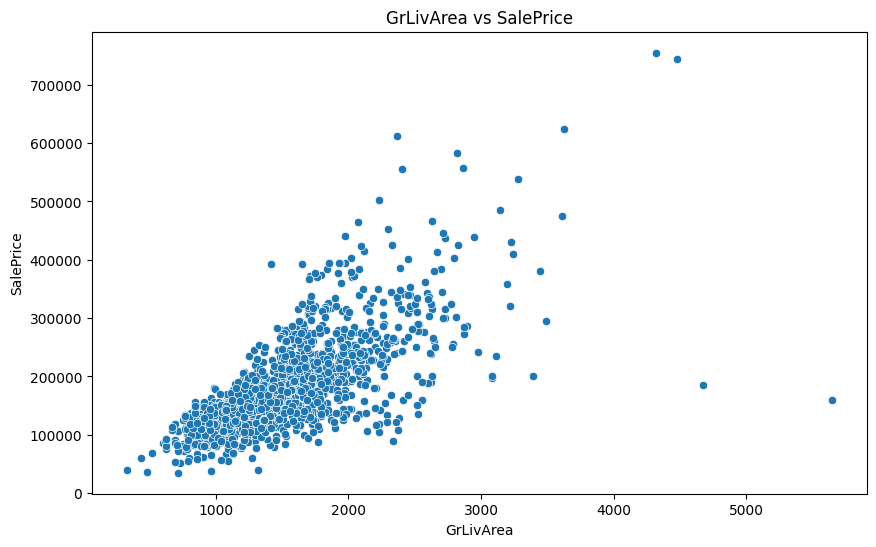

In [321]:
from analysis.analysis_src.bivariate_analysis import scatter_plot,box_plot
scatter_plot().my_plot(df,'GrLivArea','SalePrice')

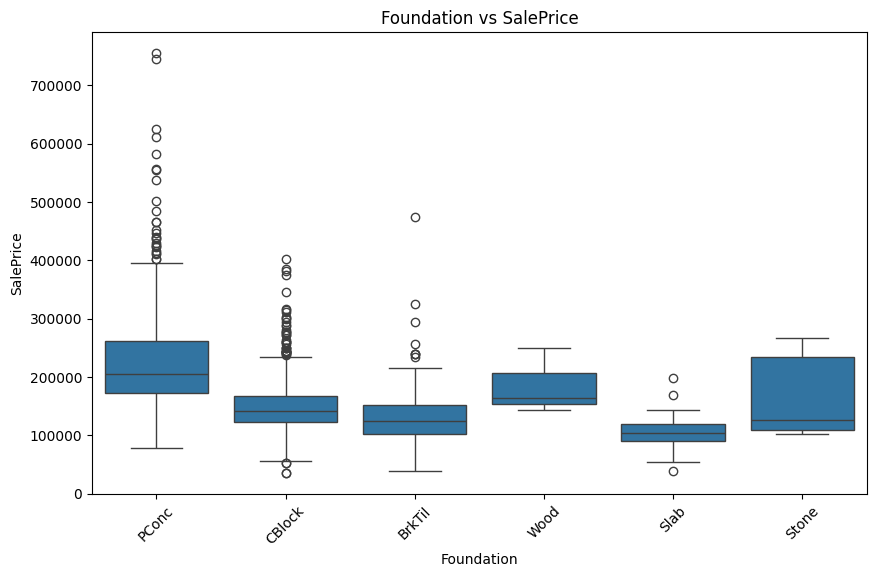

In [322]:
box_plot().my_plot(df,'Foundation','SalePrice')

In [323]:
from analysis.analysis_src.multivariate_analysis import heatmap_pairplot

selected_features = df[['OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 
                        '1stFlrSF', 'GrLivArea', 'FullBath', 'Fireplaces',  'GarageArea', 'SalePrice']
]
heatmap_pairplot().generate_correlation_heatmap(selected_features)

KeyError: "['MasVnrArea'] not in index"

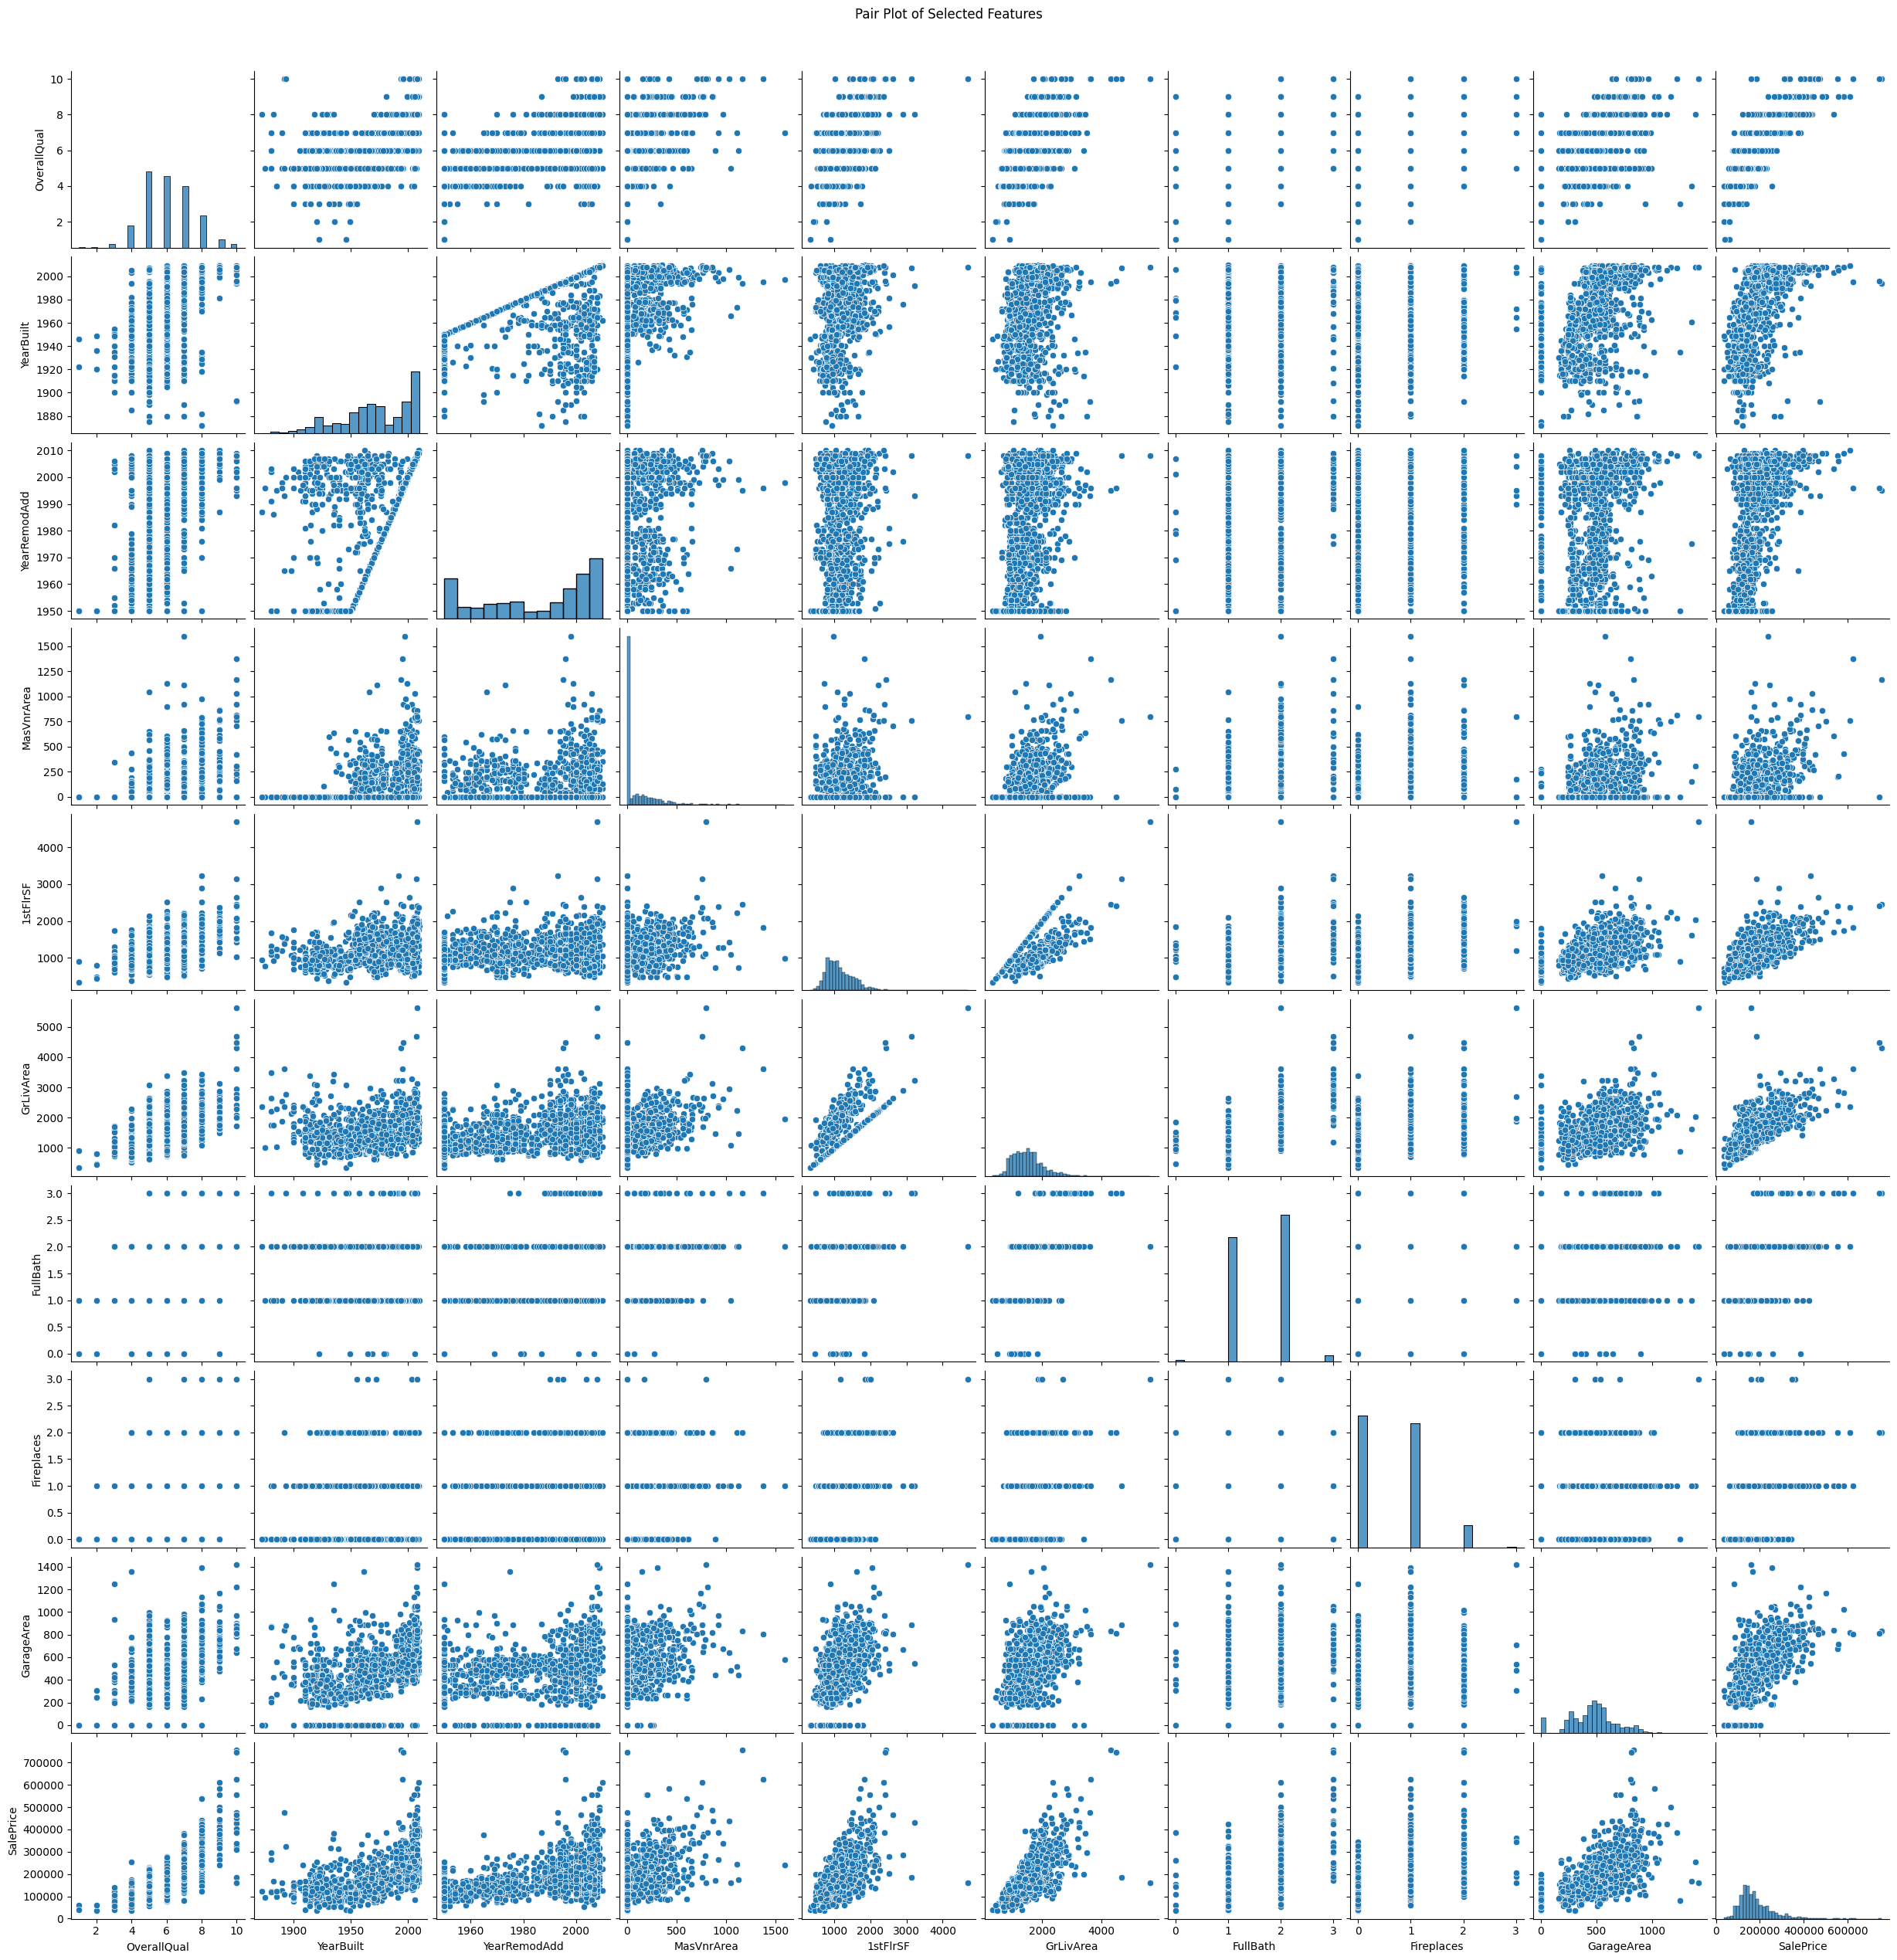

In [251]:
selected_features = df[['OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', '1stFlrSF', 'GrLivArea', 'FullBath', 'Fireplaces', 'GarageArea', 'SalePrice']]
heatmap_pairplot().generate_pairplot(selected_features)

In [296]:
#FEATURE ENGINEERING

In [324]:
numeric_features = df.select_dtypes(include=['int64','float64']).columns.tolist()
print(numeric_features)
categorical_features = df.select_dtypes(include=['object']).columns.tolist()
print(categorical_features)

['OverallQual', 'YearBuilt', 'YearRemodAdd', '1stFlrSF', 'GrLivArea', 'FullBath', 'Fireplaces', 'GarageArea', 'SalePrice']
['ExterQual', 'Foundation', 'HeatingQC', 'Neighborhood', 'CentralAir', 'SaleCondition', 'PavedDrive', 'LotShape', 'SaleType', 'HouseStyle']


In [325]:
df

,OverallQual,YearBuilt,YearRemodAdd,1stFlrSF,GrLivArea,FullBath,Fireplaces,GarageArea,ExterQual,Foundation,HeatingQC,Neighborhood,CentralAir,SaleCondition,PavedDrive,LotShape,SaleType,HouseStyle,SalePrice
0,7,2003,2003,856,1710,2,0,548,Gd,PConc,Ex,CollgCr,Y,Normal,Y,Reg,WD,2Story,208500
1,6,1976,1976,1262,1262,2,1,460,TA,CBlock,Ex,Veenker,Y,Normal,Y,Reg,WD,1Story,181500
2,7,2001,2002,920,1786,2,1,608,Gd,PConc,Ex,CollgCr,Y,Normal,Y,IR1,WD,2Story,223500
3,7,1915,1970,961,1717,1,1,642,TA,BrkTil,Gd,Crawfor,Y,Abnorml,Y,IR1,WD,2Story,140000
4,8,2000,2000,1145,2198,2,1,836,Gd,PConc,Ex,NoRidge,Y,Normal,Y,IR1,WD,2Story,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,6,1999,2000,953,1647,2,1,460,TA,PConc,Ex,Gilbert,Y,Normal,Y,Reg,WD,2Story,175000
1456,6,1978,1988,2073,2073,2,2,500,TA,CBlock,TA,NWAmes,Y,Normal,Y,Reg,WD,1Story,210000
1457,7,1941,2006,1188,2340,2,2,252,Ex,Stone,Ex,Crawfor,Y,Normal,Y,Reg,WD,2Story,266500
1458,5,1950,1996,1078,1078,1,0,240,TA,CBlock,Gd,NAmes,Y,Normal,Y,Reg,WD,1Story,142125


Will apply outlier handeling transformations after splitting to avoid data leakage

In [326]:
df.to_csv("/Users/amanpreetsingh/My Computer/VSCode/Market/extracted_data/updated_housing_data.csv", index=False)

In [371]:
def iqr(df: pd.DataFrame, feature: str):

        # Compute IQR
        Q1 = df[feature].quantile(0.25)
        Q3 = df[feature].quantile(0.75)
        IQR = Q3 - Q1

        # Define outlier bounds
        lower_bound = Q1 - 1.5 * IQR
        print(lower_bound)
        upper_bound = Q3 + 1.5 * IQR
        print(upper_bound)

        # Filter data
        df_filtered = df[(df[feature] >= lower_bound) & (df[feature] <= upper_bound)]
        print("Outliers detected using the IQR method.")

        return df_filtered

In [372]:
df = iqr(df,'SalePrice')

3937.5
340037.5
Outliers detected using the IQR method.


In [373]:
from sklearn.model_selection import train_test_split
X = df.drop(columns=['SalePrice'])  # Features (independent variables)
y = df['SalePrice']  # Target variable

In [374]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [375]:
from sklearn.preprocessing import LabelEncoder

# List of selected categorical features
selected_cat_features = ['ExterQual', 'Foundation', 'HeatingQC', 'Neighborhood', 'CentralAir', 'SaleCondition', 'PavedDrive', 'LotShape', 'SaleType', 'HouseStyle']

# Initialize LabelEncoder
encoder = LabelEncoder()

# Loop through each selected categorical feature
for feature in selected_cat_features:
    # Fit and transform on the training data
    encoder.fit(X_train[feature])
    
    # Transform the training data normally
    X_train[f'{feature}_encoded'] = encoder.transform(X_train[feature])
    
    # Handle unseen labels in test data by checking for new categories
    X_test[f'{feature}_encoded'] = X_test[feature].apply(
        lambda x: encoder.transform([x])[0] if x in encoder.classes_ else -1
    )


In [376]:
features_to_drop = ['ExterQual', 'Foundation', 'HeatingQC', 'Neighborhood', 'CentralAir', 'SaleCondition', 'PavedDrive', 'LotShape', 'SaleType', 'HouseStyle']
X_train = X_train.drop(columns=features_to_drop)
X_test = X_test.drop(columns=features_to_drop)

In [377]:
import numpy as np
def apply_transformation(df: pd.DataFrame,features: list) -> pd.DataFrame:
        df_transformed = df.copy()
        for feature in features:
            df_transformed[feature] = np.log1p(
                df[feature]
            )  # log1p handles log(0) by calculating log(1+x)
        return df_transformed

In [378]:
y_train_df = pd.DataFrame(y_train, columns=['SalePrice'])
y_train = apply_transformation(df=y_train_df,features=['SalePrice'])

In [179]:
#y_test = pd.DataFrame(y_test, columns=['SalePrice'])
#y_test = apply_transformation(df=y_test,features=['SalePrice'])

In [379]:
X_train = apply_transformation(df=X_train,features=['GrLivArea'])
X_test = apply_transformation(df=X_test,features=['GrLivArea'])

In [335]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [182]:
df[0:255]

,OverallQual,GrLivArea,TotalBsmtSF,YearRemodAdd,GarageArea,FullBath,KitchenQual,Neighborhood,MSZoning,SalePrice
0,7,1710,856,2003,548,2,Gd,CollgCr,RL,208500
1,6,1262,1262,1976,460,2,TA,Veenker,RL,181500
2,7,1786,920,2002,608,2,Gd,CollgCr,RL,223500
3,7,1717,756,1970,642,1,Gd,Crawfor,RL,140000
4,8,2198,1145,2000,836,2,Gd,NoRidge,RL,250000
...,...,...,...,...,...,...,...,...,...,...
260,6,1382,1362,1962,884,1,TA,NAmes,RL,176000
261,8,2574,1482,2007,868,2,Ex,CollgCr,RL,276000
262,6,1212,506,1995,492,1,TA,Sawyer,RL,151000
263,5,1316,926,2001,484,1,TA,OldTown,RM,130000


In [336]:
y_pred = model.predict(X_test)

In [337]:
y_pred = np.expm1(y_pred)

In [338]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_pred)
mse

1116599119.7851436

In [339]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: {rmse}")


RMSE: 33415.55206464714


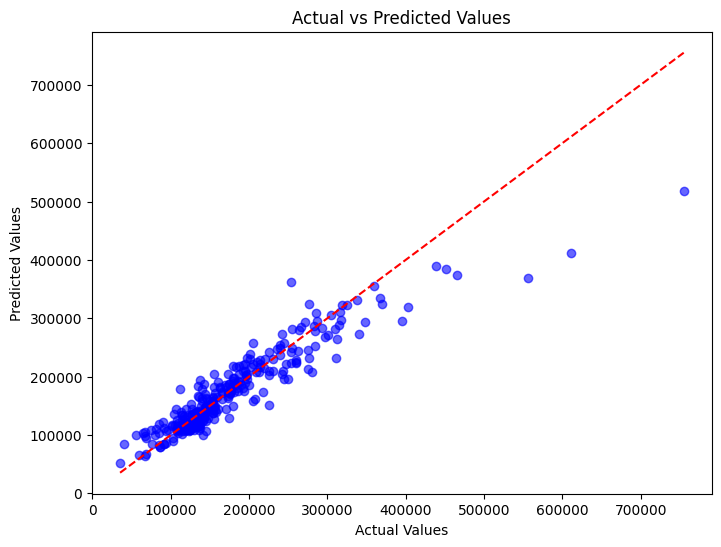

In [340]:
import matplotlib.pyplot as plt

# Assuming y_test (actual values) and y_pred (predicted values) are already defined

plt.figure(figsize=(8, 6))

# Scatter plot of actual vs predicted values
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)

# Add a line for perfect predictions (y = x)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')

# Labels and title
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")

# Show the plot
plt.show()


In [188]:
test = pd.read_csv('/Users/amanpreetsingh/My Computer/VSCode/Market/house_price_data/train.csv')
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [222]:
numeric_features = filtered_features_saleprice.select_dtypes(include=['int64','float64']).columns.tolist()
print(numeric_features)
categorical_features = test.select_dtypes(include=['object']).columns.tolist()
print(categorical_features)

['OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', '1stFlrSF', 'GrLivArea', 'FullBath', 'Fireplaces', 'GarageCars', 'GarageArea', 'SalePrice']
['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


In [ ]:
from analysis.analysis_src.multivariate_analysis import heatmap_pairplot

selected_features = test[['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']]
heatmap_pairplot().generate_correlation_heatmap(selected_features)

In [204]:
selected_features = test[['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',  'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']]


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
corr_matrix = selected_features.corr()

# Select features that are highly correlated with 'SalePrice' (correlation > 0.4)
high_corr_saleprice = corr_matrix['SalePrice'][abs(corr_matrix['SalePrice']) > 0.4].index

# Subset the selected_features dataframe to include only these highly correlated features
filtered_features_saleprice = selected_features[high_corr_saleprice]

# Set the figure size for the heatmap (adjust width and height as needed)
plt.figure(figsize=(12,10))  # Increase the figure size to your preference

# Generate the heatmap for the filtered features that are highly correlated with 'SalePrice'
sns.heatmap(filtered_features_saleprice.corr(), annot=True, cmap='coolwarm', fmt='.2f', cbar=True,
            vmin=-1, vmax=1)  # Set correlation range to -1 to 1
plt.title("Correlation Matrix with Features Correlated to SalePrice > 0.4")
plt.show()

# Display the filtered dataset with only highly correlated features with SalePrice
filtered_features_saleprice.head()


In [341]:
test['MSZoning'].unique()


array(['RL', 'RM', 'C (all)', 'FV', 'RH'], dtype=object)

In [283]:
from scipy import stats

# Loop through categorical features to perform ANOVA
for col in [
    'ExterQual',
    'Foundation',
    'HeatingQC',
    'Neighborhood',
    'CentralAir',
    'SaleCondition',
    'PavedDrive',
    'LotShape',
    'SaleType',
    'HouseStyle'
]:

    # Perform ANOVA
    categories = test[col].unique()
    grouped_data = [test[test[col] == category]['SalePrice'] for category in categories]
    f_stat, p_value = stats.f_oneway(*grouped_data)
    
    print(f'{col}: F-statistic = {f_stat}, p-value = {p_value}')


ExterQual: F-statistic = 443.33483141504627, p-value = 1.439551096779444e-204
Foundation: F-statistic = 100.25385058740888, p-value = 5.791895002231574e-91
HeatingQC: F-statistic = 88.39446198869796, p-value = 2.667062092104357e-67
Neighborhood: F-statistic = 71.78486512058272, p-value = 1.5586002827718626e-225
CentralAir: F-statistic = 98.30534356615253, p-value = 1.8095061559276083e-22
SaleCondition: F-statistic = 45.57842830969571, p-value = 7.988268404991176e-44
PavedDrive: F-statistic = 42.02417941762533, p-value = 1.8035688906531733e-18
LotShape: F-statistic = 40.13285166226295, p-value = 6.447523852014698e-25
SaleType: F-statistic = 28.863054116984088, p-value = 5.0397668894670344e-42
HouseStyle: F-statistic = 19.595000995981223, p-value = 3.376776535121222e-25


In [380]:
param_grid = {
    'n_estimators': [100, 200, 300, 400],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7, 9, 11],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'reg_alpha': [0, 0.01, 0.1, 1],      # L1 regularization
    'reg_lambda': [0.1, 1, 10]           # L2 regularization
}


In [381]:
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV

xgb = XGBRegressor(random_state=42)

random_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_grid,
    n_iter=30,             # Number of different combinations to try
    scoring='neg_root_mean_squared_error',
    cv=5,
    verbose=2,
    n_jobs=-1
)

random_search.fit(X_train, y_train)

# Best model
best_xgb = random_search.best_estimator_
print("Best Parameters:", random_search.best_params_)


Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=9, n_estimators=200, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=9, n_estimators=200, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=9, n_estimators=200, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=9, n_estimators=200, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=9, n_estimators=200, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.6, learning_rate=0.05, max_depth=9, n_estimators=200, reg_alpha=0.01, reg_lambda=10, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.6, learning_rate=0.05, max_depth=9, n_estimators

In [382]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

y_pred_best = best_xgb.predict(X_test)
y_pred_best = np.expm1(y_pred_best)

rmse = np.sqrt(mean_squared_error(y_test, y_pred_best))
r2 = r2_score(y_test, y_pred_best)

print(f"Tuned XGBoost RMSE: {rmse:.2f}")
print(f"Tuned XGBoost R² Score: {r2:.4f}")


Tuned XGBoost RMSE: 20279.31
Tuned XGBoost R² Score: 0.8707


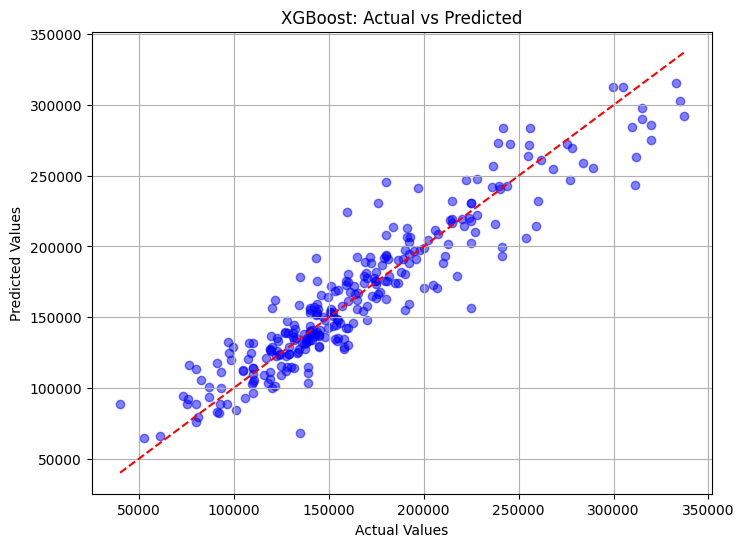

In [384]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_best, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # perfect line
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('XGBoost: Actual vs Predicted')
plt.grid(True)
plt.show()


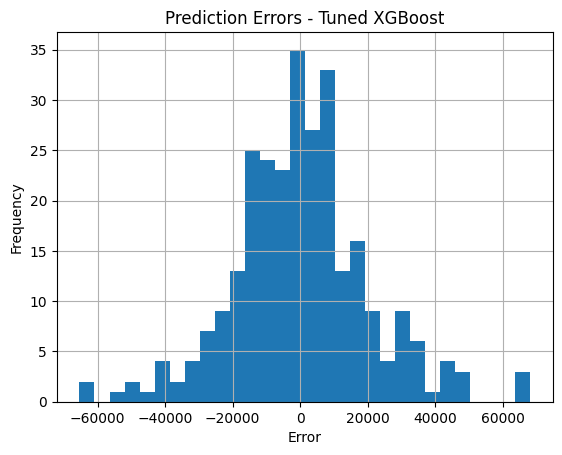

In [383]:
import matplotlib.pyplot as plt

errors = y_test - y_pred_best
plt.hist(errors, bins=30)
plt.title("Prediction Errors - Tuned XGBoost")
plt.xlabel("Error")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()
